In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

Import training data from file:

In [2]:
with open('trainingset.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, dtype={'booking_bool':bool,'srch_destination_id':np.int32, 
                                     'site_id':np.int32, 'visitor_location_country_id':np.int32,
                                     'visitor_hist_starrating':np.float, 'visitor_hist_adr_usd':np.float,
                                     'prop_country_id':np.int32, 'prop_id':np.int32, 
                                     'prop_starrating':np.int32, 'prop_review_score':np.float,
                                     'prop_brand_bool':bool, 'prop_location_score1':np.float,
                                     'prop_location_score2':np.float, 'prop_log_historical_price':np.float,
                                     'price_usd':np.float, 'promotion_flag':bool,\
                                     'srch_length_of_stay':np.int32, 'srch_booking_window':np.int32,
                                     'srch_adults_count':np.int32, 'srch_children_count':np.int32,
                                     'srch_room_count':np.int32, 'srch_saturday_night_bool':bool,
                                     'srch_query_affinity_score':np.float, 'orig_destination_distance':np.float,
                                     'random_bool':bool, 'position':np.int32, 'click_bool':bool,
                                     'booking_bool':bool, 'gross_booking_usd':np.float})


# EDA

Number of unique stuff:

In [35]:
print("Number of unique searches:"),len(df.srch_id.unique())
print("Number of countries:"),len(df.prop_country_id.unique())
print("Number of hotels:"),len(df.prop_id.unique())

Number of unique searches: 199795
Number of countries: 172
Number of hotels: 129113


Difference in price between client history and current price for booked/clicked/none

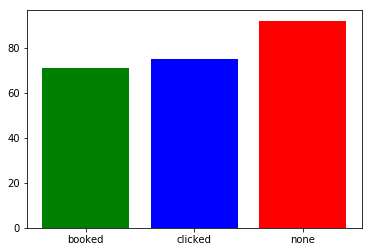

In [3]:
df['usd_diff'] = abs(df.price_usd - df.visitor_hist_adr_usd)

diffUsd_click = np.array(df.usd_diff.loc[df['click_bool']==True])
diffUsd_click = diffUsd_click[~np.isnan(diffUsd_click)]
mean_click = np.mean(diffUsd_click)

diffUsd_book = np.array(df.usd_diff.loc[df['booking_bool']==True])
diffUsd_book = diffUsd_book[~np.isnan(diffUsd_book)]
mean_book = np.mean(diffUsd_book)

diffUsd_none = np.array(df.usd_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffUsd_none = diffUsd_none[~np.isnan(diffUsd_none)]
mean_none = np.mean(diffUsd_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

Difference in rating between client history and prop rating for booked/clicked/none

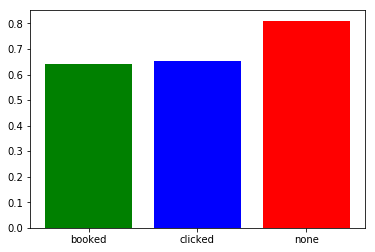

In [4]:
df['star_diff'] = abs(df.prop_starrating - df.visitor_hist_starrating) 

diffStar_click = np.array(df.star_diff.loc[df['click_bool']==True])
diffStar_click = diffStar_click[~np.isnan(diffStar_click)]
mean_click = np.mean(diffStar_click)

diffStar_book = np.array(df.star_diff.loc[df['booking_bool']==True])
diffStar_book = diffStar_book[~np.isnan(diffStar_book)]
mean_book = np.mean(diffStar_book)

diffStar_none = np.array(df.star_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffStar_none = diffStar_none[~np.isnan(diffStar_none)]
mean_none = np.mean(diffStar_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

See if promotion flag influences click/book:

In [38]:
totalClick = len(df.loc[df['click_bool']==True])
promClick = len(df.loc[(df['click_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr clicks/Promotion flag clicks"), totalClick, promClick

totalBook = len(df.loc[df['booking_bool']==True])
promBook = len(df.loc[(df['booking_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr bookings/Promotion flag bookings"), totalBook, promBook

totalProm = len(df.loc[df['promotion_flag']==True])
print ("Number of promotion flags:"), totalProm

Total nr clicks/Promotion flag clicks 221879 64469
Total nr bookings/Promotion flag bookings 138390 41947
Number of promotion flags: 1069118


Overview of competitors

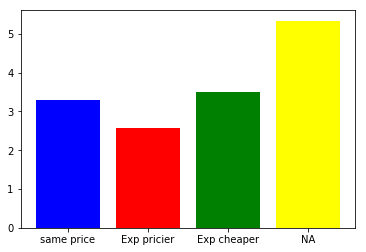

In [39]:
click_equal_1 = len(df.comp1_rate.loc[(df.comp1_rate == 0) & (df.click_bool == True)])
click_more_1 = len(df.comp1_rate.loc[(df.comp1_rate == -1) & (df.click_bool == True)])
click_less_1 = len(df.comp1_rate.loc[(df.comp1_rate == 1) & (df.click_bool == True)])
click_na_1 = len(df.comp1_rate.loc[(np.isnan(df.comp1_rate)) & (df.click_bool == True)])

npRes = np.log10(np.array([click_equal_1, click_more_1, click_less_1, click_na_1]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()



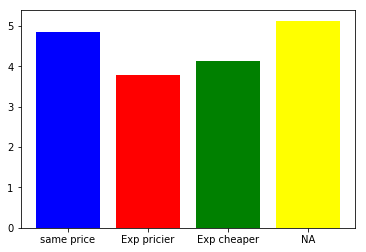

In [37]:
click_equal_2 = len(df.comp2_rate.loc[(df.comp2_rate == 0) & (df.click_bool == True)])
click_more_2 = len(df.comp2_rate.loc[(df.comp2_rate == -1) & (df.click_bool == True)])
click_less_2 = len(df.comp2_rate.loc[(df.comp2_rate == 1) & (df.click_bool == True)])
click_na_2 = len(df.comp2_rate.loc[(np.isnan(df.comp2_rate)) & (df.click_bool == True)])

npRes = np.log10(np.array([click_equal_2, click_more_2, click_less_2, click_na_2]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()


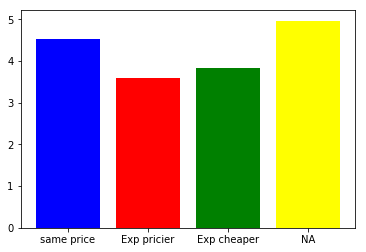

In [161]:
click_equal_3 = len(df.comp3_rate.loc[(df.comp3_rate == 0) & (df.booking_bool == True)])
click_more_3 = len(df.comp3_rate.loc[(df.comp3_rate == -1) & (df.booking_bool == True)])
click_less_3 = len(df.comp3_rate.loc[(df.comp3_rate == 1) & (df.booking_bool == True)])
click_na_3 = len(df.comp3_rate.loc[(np.isnan(df.comp3_rate)) & (df.booking_bool == True)])

npRes = np.log10(np.array([click_equal_3, click_more_3, click_less_3, click_na_3]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()

# Fill in missing data and create composite features

Fill in missing values with either first quartile of country or mean of country

In [6]:
df.head(0)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,usd_diff,star_diff


In [5]:
#Difference in price between property historical price and current price
df['diff_hist_price'] = np.exp(df.prop_log_historical_price) - df.price_usd


In [7]:
df.prop_location_score2[np.isnan(df.prop_location_score2)] = -1
for c in df.prop_country_id.unique():
    #prop_location_score2 filled in with first quartile
    if len(df[(df.prop_country_id == c) & (df.prop_location_score2 != -1)]) != 0: 
        mean_country = np.mean(df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 != -1) ])
        min_country = min(df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 != -1)])
        first_quart = (min_country+mean_country)/2
        df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 == -1) ] = first_quart
    else:
        df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 == -1) ] = 0 
    #the rest are filled in with the mean  
    #difference in rating between client hist and prop rating
    df.star_diff.loc[(np.isnan(df.star_diff)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.star_diff.loc[df.prop_country_id == c])
    #difference in price between client hist and prop price
    df.usd_diff.loc[(np.isnan(df.usd_diff)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.usd_diff.loc[df.prop_country_id == c])
    #difference in distance between original dest and prop
    df.orig_destination_distance.loc[(np.isnan(df.orig_destination_distance)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.orig_destination_distance.loc[df.prop_country_id == c])
    #search query affinity
    df.srch_query_affinity_score.loc[(np.isnan(df.srch_query_affinity_score)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.srch_query_affinity_score.loc[df.prop_country_id == c])
    #review score
    df.prop_review_score.loc[(np.isnan(df.prop_review_score)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.prop_review_score.loc[df.prop_country_id == c])
   
#difference between current price and historical price gets 0
df.diff_hist_price[np.isnan(df.diff_hist_price)] = 0       



Prices, stars and scores ranks:

In [21]:
df['price_rank'] = df.groupby('srch_id', sort=False)['price_usd'].rank(ascending=True, method ="min")
df['stars_rank'] = df.groupby('srch_id', sort=False)['prop_starrating'].rank(ascending=True, method = "min")
df['score_rank'] = df.groupby('srch_id', sort=False)['prop_location_score2'].rank(ascending=True, method = "min")

In [22]:
df[['booking_bool','click_bool','price_rank','stars_rank','score_rank']].corr()


,booking_bool,click_bool,price_rank,stars_rank,score_rank
booking_bool,1.000000,0.782889,-0.061640,0.010954,0.004087
click_bool,0.782889,1.000000,-0.073675,0.010862,-0.002905
price_rank,-0.061640,-0.073675,1.000000,0.589670,0.208145
stars_rank,0.010954,0.010862,0.589670,1.000000,0.163179
score_rank,0.004087,-0.002905,0.208145,0.163179,1.000000


In [23]:
dfPriceRank= df.groupby('price_rank').count()
print dfPriceRank.click_bool
print dfPriceRank.booking_bool

price_rank
1.0     218934
2.0     209080
3.0     205915
4.0     203644
5.0     201863
6.0     197140
7.0     191738
8.0     186979
9.0     183120
10.0    179403
11.0    175186
12.0    171186
13.0    166989
14.0    163813
15.0    160101
16.0    157438
17.0    152779
18.0    149698
19.0    146099
20.0    142653
21.0    139081
22.0    135358
23.0    131355
24.0    128149
25.0    124325
26.0    120109
27.0    115764
28.0    108195
29.0    101948
30.0     94968
31.0     84038
32.0     64037
33.0     34956
34.0     10489
35.0      1640
36.0       159
37.0        16
38.0         2
Name: click_bool, dtype: int64
price_rank
1.0     218934
2.0     209080
3.0     205915
4.0     203644
5.0     201863
6.0     197140
7.0     191738
8.0     186979
9.0     183120
10.0    179403
11.0    175186
12.0    171186
13.0    166989
14.0    163813
15.0    160101
16.0    157438
17.0    152779
18.0    149698
19.0    146099
20.0    142653
21.0    139081
22.0    135358
23.0    131355
24.0    128149
25.0    124325
26

In [24]:
dfScoreRank= df.groupby('score_rank').count()
print dfScoreRank.click_bool
print dfScoreRank.booking_bool

score_rank
1.0     207725
2.0     187494
3.0     184199
4.0     179436
5.0     174513
6.0     166826
7.0     160916
8.0     154908
9.0     149897
10.0    144913
11.0    140032
12.0    135200
13.0    130553
14.0    126455
15.0    122428
16.0    118770
17.0    115000
18.0    111638
19.0    107974
20.0    104549
21.0    100978
22.0     97745
23.0     94035
24.0     90968
25.0     87135
26.0     81800
27.0     77637
28.0     72334
29.0     66373
30.0     59780
31.0     50965
32.0     37995
33.0     20020
34.0      5808
35.0       902
36.0        83
37.0        12
38.0         3
Name: click_bool, dtype: int64
score_rank
1.0     207725
2.0     187494
3.0     184199
4.0     179436
5.0     174513
6.0     166826
7.0     160916
8.0     154908
9.0     149897
10.0    144913
11.0    140032
12.0    135200
13.0    130553
14.0    126455
15.0    122428
16.0    118770
17.0    115000
18.0    111638
19.0    107974
20.0    104549
21.0    100978
22.0     97745
23.0     94035
24.0     90968
25.0     87135
26

Fill in missing competitor data with 0:

In [9]:
df.iloc[:,27:51] = df.iloc[:,27:51].fillna(value = 0, axis = 0)

Create new composite features:

In [10]:
#Total price/per night
df['total_price'] = df.price_usd * df.srch_room_count

In [11]:
#Price per person
df['price_per_pers'] = (df.price_usd * df.srch_room_count)/(df.srch_adults_count + df.srch_children_count)

Composite feature of the two property location scores:

In [12]:
df['prop_score'] = (df.prop_location_score2 + 0.00001)/(df.prop_location_score1 + 0.00001)

# Feature importance

In [20]:
target = df.click_bool 
target2 = df.booking_bool

In [21]:
dfTest = df[['prop_score','prop_location_score1','prop_location_score2','diff_hist_price',
                'usd_diff', 'star_diff', 'srch_query_affinity_score', 'orig_destination_distance',
                'prop_review_score','position','price_rank','stars_rank','score_rank']]
             


In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
dfTest = dfTest.fillna(value='0')
model = ExtraTreesClassifier()
model.fit(dfTest, target)
dictImp  = zip(dfTest.head(0), model.feature_importances_)


MemoryError: 

In [17]:
from tabulate import tabulate

In [ ]:
print tabulate(dictImp)
print tabulate(dictImp2)

In [ ]:
dfTest2 = df[['prop_score','prop_location_score1','prop_location_score2','diff_hist_price',
                'usd_diff', 'star_diff', 'srch_query_affinity_score', 'orig_destination_distance',
                'prop_review_score','position','price_rank','stars_rank','score_rank','click_bool','booking_bool']]
print dfTest2.corr()